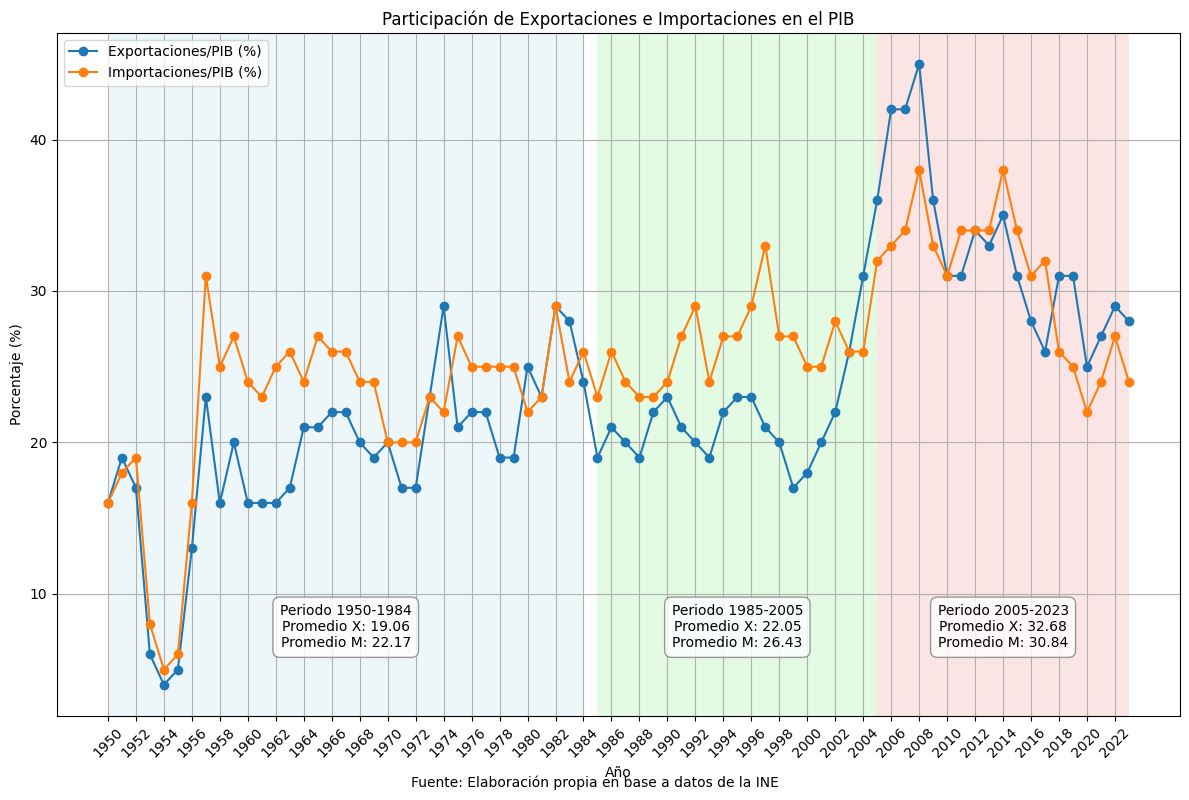

In [2]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect("../../db/proyectomacro.db")
df = pd.read_sql_query("SELECT * FROM participacion_x_m_pib", conn)
conn.close()

# Asegurar que 'Año' es numérico
df['Año'] = df['Año'].astype(int)

# Definir periodos
df_periodo1 = df[(df['Año'] >= 1950) & (df['Año'] <= 1984)]
df_periodo2 = df[(df['Año'] >= 1985) & (df['Año'] <= 2005)]
df_periodo3 = df[(df['Año'] >= 2005) & (df['Año'] <= 2023)]

# Calcular promedios para exportaciones (X) e importaciones (M) en cada periodo
promedio_p1_X = df_periodo1['X'].mean()
promedio_p1_M = df_periodo1['M'].mean()

promedio_p2_X = df_periodo2['X'].mean()
promedio_p2_M = df_periodo2['M'].mean()

promedio_p3_X = df_periodo3['X'].mean()
promedio_p3_M = df_periodo3['M'].mean()

# Definir textos para las anotaciones con recuadros estéticos
text_p1 = (f"Periodo 1950-1984\n"
           f"Promedio X: {promedio_p1_X:.2f}\n"
           f"Promedio M: {promedio_p1_M:.2f}")
text_p2 = (f"Periodo 1985-2005\n"
           f"Promedio X: {promedio_p2_X:.2f}\n"
           f"Promedio M: {promedio_p2_M:.2f}")
text_p3 = (f"Periodo 2005-2023\n"
           f"Promedio X: {promedio_p3_X:.2f}\n"
           f"Promedio M: {promedio_p3_M:.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12,8))

# Graficar las series de exportaciones e importaciones
ax.plot(df['Año'], df['X'], marker='o', label='Exportaciones/PIB (%)')
ax.plot(df['Año'], df['M'], marker='o', label='Importaciones/PIB (%)')

# Propiedades estéticas para los recuadros de texto
bbox_props = dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray", alpha=0.8)

# Calcular puntos medios de cada periodo para posicionar las anotaciones
mid_p1 = (1950 + 1984) / 2
mid_p2 = (1985 + 2005) / 2
mid_p3 = (2005 + 2023) / 2

# Definir una posición en el eje y para los textos (10% por encima del mínimo del eje)
ymin, ymax = ax.get_ylim()
y_pos = ymin + 0.1 * (ymax - ymin)

# Agregar las anotaciones con recuadros
ax.text(mid_p1, y_pos, text_p1, fontsize=10, color='black', bbox=bbox_props, ha='center')
ax.text(mid_p2, y_pos, text_p2, fontsize=10, color='black', bbox=bbox_props, ha='center')
ax.text(mid_p3, y_pos, text_p3, fontsize=10, color='black', bbox=bbox_props, ha='center')

# Sombrear los periodos históricos
ax.axvspan(1950, 1984, facecolor='lightblue', alpha=0.21)
ax.axvspan(1985, 2005, facecolor='lightgreen', alpha=0.25)
ax.axvspan(2005, 2023, facecolor='lightcoral', alpha=0.21)

# Configurar etiquetas, título y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Participación de Exportaciones e Importaciones en el PIB')
ax.legend(loc='upper left')
plt.grid()
plt.xticks(df['Año'][::2], rotation=45)
plt.tight_layout()
plt.figtext(0.5, 0.01, "Fuente: Elaboración propia en base a datos de la INE", ha="center", fontsize=10, color='black')

# Crear la carpeta 'imagenes' si no existe y guardar la imagen
if not os.path.exists("imagenes"):
    os.makedirs("imagenes")
plt.savefig("imagenes/2.png", bbox_inches='tight')

# Mostrar gráfico
plt.show()



